In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('stocks.csv')
X = dataset.iloc[:, :-1].values
X = [ [float(i[1]),i[2]] for i in X]
print(X)
y = dataset.iloc[:, -1]

[[841.6, 5.24], [629.1, 3.89], [244.95, 3.81], [90.0, 3.18], [58.6, 2.72], [487.0, 2.34], [824.9, 1.67], [117.0, 1.56], [473.0, 1.14], [623.5, 1.14], [72.45, 1.05], [557.95, 1.04], [674.0, 0.95], [214.45, 0.94], [361.05, 0.93], [1360.9, 0.82], [4253.25, 0.76], [579.45, 0.67], [130.65, 0.66], [1025.0, 0.53], [2114.95, 0.52], [388.25, 0.31], [192.95, 0.31], [660.0, 0.2], [715.95, 0.16], [437.95, 0.07], [275.05, 0.04], [4206.55, 0.02], [165.35, 19.99], [173.9, 2.86], [309.0, 1.79], [318.5, 1.73], [806.35, 1.73], [45.55, 1.67], [3834.0, 1.62], [2329.75, 1.6], [734.35, 1.51], [8519.7, 1.45], [106.4, 1.4], [14.35, 1.08], [316.75, 0.92], [17.2, 0.89], [111.5, 0.79], [704.55, 0.62], [927.0, 0.6], [426.0, 0.55], [312.2, 0.42], [3475.55, 0.32], [414.7, 0.27], [375.6, 0.23], [3250.6, 0.22], [2057.2, 0.08], [76.4, 0.07], [960.7, 0.72], [145.7, 2.44], [2924.95, 0.64], [937.25, 2.39], [963.9, 2.24], [365.3, 1.01], [105.35, 0.96], [385.2, 0.76], [198.9, 0.46], [75.9, 0.33], [588.2, 0.16], [81000.0, 1

In [3]:
d = y.astype('category').cat.categories.values
y = y.astype('category').cat.codes.values
print(d)

['Automobile' 'IT' 'Power' 'Tech' 'banking' 'healthcare' 'oil&gas'
 'steel&metal']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.29, random_state = 100)
print(X_train)

[[8519.7, 1.45], [124.55, 0.66], [375.6, 0.03], [3834.0, 1.54], [2322.0, 1.92], [2329.75, 1.6], [414.7, 0.13], [46.0, 11.98], [111.5, 1.71], [316.75, 1.26], [117.0, 1.56], [817.85, 0.13], [124.55, 0.17], [165.35, 19.99], [3020.05, 0.84], [1217.0, 0.13], [316.75, 0.92], [17.2, 0.89], [963.9, 2.3], [106.4, 0.87], [629.1, 3.89], [409.8, 1.46], [1081.0, 0.67], [426.0, 0.55], [165.35, 19.81], [8519.7, 1.45], [704.55, 0.67], [2157.55, 0.95], [487.0, 1.92], [145.7, 2.47], [124.55, 0.66], [414.7, 0.13], [116.75, 0.3], [734.35, 1.83], [145.7, 2.44], [437.95, 0.28], [409.8, 1.88], [531.2, 1.2], [963.9, 2.24], [927.0, 0.6], [928.0, 0.82], [365.5, 0.99], [437.95, 0.28], [81000.0, 1.69], [46.0, 11.98], [579.45, 0.58], [76.4, 0.07], [414.7, 0.13], [72.45, 1.05], [2114.95, 0.52], [516.0, 0.12], [674.0, 1.43], [3475.55, 0.12], [232.5, 0.71], [704.55, 0.67], [105.35, 1.2], [674.0, 0.95], [4253.25, 0.76], [2329.75, 1.6], [824.9, 2.33], [426.0, 0.55], [2057.2, 0.11], [509.0, 0.56], [8519.7, 1.45], [2123.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [7]:
# Predicting the sector I would have to start in to get a starting price of Rs 9 with 1 growth rate
print(d[classifier.predict(sc.transform([[9,1]]))[0]])

IT


In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 2]
 [1 1]
 [1 3]
 [1 1]
 [2 5]
 [5 1]
 [5 5]
 [1 1]
 [5 1]
 [1 0]
 [1 7]
 [5 7]
 [5 5]
 [1 1]
 [1 1]
 [5 3]
 [1 2]
 [1 1]
 [1 7]
 [1 1]
 [5 7]
 [1 1]
 [1 7]
 [2 0]
 [5 7]
 [1 5]
 [1 1]
 [1 5]
 [5 7]
 [1 5]
 [5 3]
 [5 6]
 [5 5]
 [1 2]
 [5 5]
 [5 4]
 [4 0]
 [1 1]
 [5 5]
 [1 7]
 [5 1]
 [1 1]
 [1 1]
 [5 3]
 [5 6]
 [5 4]
 [5 3]
 [1 5]
 [1 3]
 [5 5]
 [5 5]
 [1 1]
 [5 1]
 [1 1]
 [1 5]
 [5 1]
 [1 2]
 [5 5]
 [5 7]
 [5 1]
 [1 3]
 [5 5]
 [1 1]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [1 5]
 [5 5]
 [0 0]
 [1 1]]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 1  1  1  0  1  0  0  0]
 [ 0 17  0  0  0  6  0  0]
 [ 0  4  0  0  0  0  0  0]
 [ 0  3  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  6  1  0  0 15  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  4  0  0  0  5  0  0]]
0.44594594594594594
[7 4 7 0 7 2 4 5 7 4 0 7 2 7 5 7 2 4 7 5 7 2 5 7 3 2 3 5 7 4 4 2 2 5 4 5 5
 5 7 2 7 4 7 4 5 5 7 2 7 4 2 4 7 5 7 4 1 5 5 4 4 4 4 7 2 7 4 7 2 5 4 5 7 7]
0.14864864864864866


In [2]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve

from sklearn.preprocessing import LabelEncoder

from keras_preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

import re

from IPython.display import display

import os

import string

import time

import random

import matplotlib.pyplot as plt


random.seed(10)

In [3]:
from tensorflow.keras.datasets import imdb

num_words = 5000

( X_train , y_train ),( X_test , y_test ) = imdb.load_data(num_words = 5000)

In [4]:
sequence_length = 300

batch_size = 128

X_train_seq = pad_sequences( X_train, maxlen = sequence_length)

X_test_seq = pad_sequences( X_test, maxlen = sequence_length)

encoder = LabelEncoder()

encoder.fit(y_train)

y_train_transformed = encoder.transform(y_train).reshape(-1,1)

y_test_transformed = encoder.transform(y_test).reshape(-1,1)

e = Embedding( num_words , 10 , input_length = sequence_length )

In [5]:
model = Sequential()

model.add(e)

model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))

model.add(Dense(1, activation = 'sigmoid' ))

model.summary()

model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

early_stopper = EarlyStopping( monitor = 'val_acc' , min_delta = 0.0005, patience = 3 )

reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0)

callbacks = [ reduce_lr , early_stopper]

train_history = model.fit( X_train_seq , y_train_transformed , batch_size = batch_size, epochs = 5,validation_split = 0.1 , verbose = 1 , callbacks = callbacks)

score = model.evaluate( X_test_seq , y_test_transformed , batch_size = batch_size)

print( "Accuracy: {:0.4}".format( score[1] ))

print( "Loss:", score[0] )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 10)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 121,297
Trainable params: 121,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
176/176 [==============================] - 365s 2s/step - loss: 0.6340 - accuracy: 0.6502 - val_loss: 0.4492 - val_accuracy: 0.8236 - lr: 0.0010
Epoch 2/5
176/176 [==============================] - 503s 3s/step - loss: 0.3872 - accuracy: 0.8363 - val_loss: 0.3583 - val_accuracy: 0.8476 - lr: 0.0010
Epoc

# Agriculture Stock valuation based on News and Sector growth

In [50]:
import pandas as pd
df = pd.read_csv('companies.csv')
df.head()

,srno,name,rating,sector,text
0,1,PI Industries Ltd.,3.0,Agrochemicals,es changed hands on the counter. The scrip ope...
1,2,Bharat Rasayan Ltd.,0.5,Agrochemicals,"the year 1989, is a Mid Cap company (having a ..."
2,3,UPL Ltd.,0.5,Agrochemicals,"E Charts, historical charts, F&O Quote, Stock ..."
3,4,DCM Shriram Ltd.,1.0,Chemical Manufacturing,yst / Investor Meet - IntimationIntimation of ...
4,5,Coromandel International Ltd.,3.0,Fertilizers,"Interntl. Share Price, Future and Options Cor..."


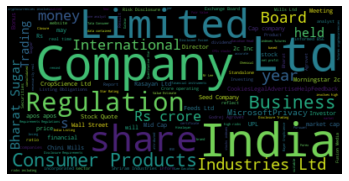

In [51]:
import nltk
from nltk.corpus import stopwords
from wordcloud import STOPWORDS, WordCloud
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [79]:
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda rating : +1 if float(rating) >2 else -1)

In [80]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

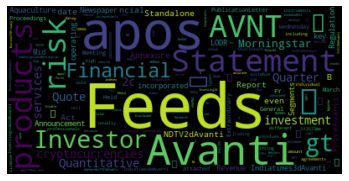

In [81]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","stock","share", "company", "ltd", "market", "sector", "India", "cap", "Future", "Rs", "crore", "year"]) 
## common words removed
pos = " ".join(review for review in positive.text)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

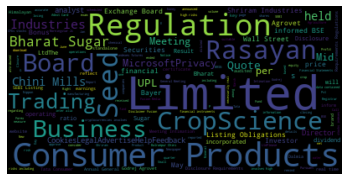

In [82]:
neg = " ".join(review for review in negative.text)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [83]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['text'] = df['text'].apply(remove_punctuation)
dfNew = df[['text','sentiment']]
dfNew.head()

,text,sentiment
1,"the year 1989, is a Mid Cap company (having a ...",-1
2,"E Charts, historical charts, F&O Quote, Stock ...",-1
3,yst / Investor Meet - IntimationIntimation of ...,-1
5,"rporated in the year 1958, is a Mid Cap compan...",-1
6,"the year 1991, is a Mid Cap company (having a ...",-1


In [84]:
import numpy as np

index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]
print(test['text'])

1     the year 1989, is a Mid Cap company (having a ...
5     rporated in the year 1958, is a Mid Cap compan...
6     the year 1991, is a Mid Cap company (having a ...
10    I)Disclaimer Fusion Media would like to remind...
Name: text, dtype: object


In [85]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

lr.fit(X_train,y_train)

predictions = lr.predict(X_test)
print(X_test)

  (0, 5)	1
  (0, 13)	1
  (0, 26)	1
  (0, 34)	2
  (0, 35)	2
  (0, 57)	1
  (0, 76)	4
  (0, 77)	1
  (0, 78)	1
  (0, 80)	1
  (0, 81)	1
  (0, 96)	4
  (0, 102)	1
  (0, 106)	6
  (0, 110)	1
  (0, 119)	1
  (0, 127)	2
  (0, 142)	2
  (0, 154)	2
  (0, 157)	1
  (0, 166)	3
  (0, 172)	4
  (0, 177)	2
  (0, 191)	1
  (0, 202)	2
  :	:
  (3, 641)	1
  (3, 652)	3
  (3, 654)	1
  (3, 658)	1
  (3, 660)	1
  (3, 672)	4
  (3, 674)	2
  (3, 683)	1
  (3, 704)	1
  (3, 705)	2
  (3, 708)	13
  (3, 709)	1
  (3, 723)	3
  (3, 724)	16
  (3, 726)	1
  (3, 729)	1
  (3, 735)	7
  (3, 741)	4
  (3, 745)	1
  (3, 772)	2
  (3, 777)	1
  (3, 786)	1
  (3, 787)	1
  (3, 792)	1
  (3, 793)	1


In [87]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[4]], dtype=int64)

In [88]:
print(classification_report(predictions,y_test))
print(predictions)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

[-1 -1 -1 -1]


In [89]:
text = "Corporation Ltd.The genesis of Deepak Fertilisers and Petrochemicals Corporation (DFPCL) could be said to be in the year 1970 when C. K. Mehta set up Deepak Nitrite (DNL), combining his skills in trading and manuf ...NDTV2dDeepak Fertilisers & Petrochemicals Corporation Share PriceDeepak Fertilisers & Petrochemicals Corporation Ltd., incorporated in the year 1979, is a Small Cap company (having a market cap of Rs 8,074.30 Crore) operating in Fertilisers sector. Deepak ...Indiatimes3dDeepak Fertilisers IPOThe IPO page of Deepak Fertilisers & Petrochemicals Corporation Ltd. captures the details on its Issue Open Date, Issue Close Date, Listing Date, Face Value, Price band, Issue Size, Issue Type, and ...Indiatimes1yDEEPAK FERTILISERS & PETROCHEMICALS CORPORATION LTD. - Compliances-Reg. 39 (3) - Details of Loss of Certificate / Duplicate CertificateDEEPAK FERTILISERS & PETROCHEMICALS CORPORATION LTD. - Compliances-Reg. 39 (3) - Details of Loss of Certificate / Duplicate Certificate. Download < Back: 02:06 PM : Intimation und ...money.rediff4monDeepak Fertilizers & Petrochemicals Corp Ltd.Deepak Fertilizers And Petrochemicals Corporation Limited has informed the Exchange about cessation of Ashok Kumar Purwaha as Independent Director of the company w.e.f. 06-Jul-2022 ...Business Standard10dDEEPAK FERTILISERS & PETROCHEMICALS CORPORATION LTD. - Announcement under Regulation 30 (LODR)-Analyst / Investor Meet - IntimationIntimation of Schedule of Analyst / Investor Meet under Regulation 30 of the SEBI (Listing Obligations and Disclosure Requirements) Regulations, 2015 ...money.rediff13dDeepak Fertilisers and Petrochemicals Corp Ltd (DPFE)Get an in-depth profile of Deepak Fertilisers and Petrochemicals Corp Ltd, including a general overview of the company's business and key management, as well as employee data and location and contact ...Investing5monDPFE.BO Deepak Fertilisers & Petrochem - Share priceDeepak Fertilisers and Petrochemicals Corporation Limited is a holding company. The Company is engaged in the business of fertilizers, agri services, bulk chemicals, mining chemicals and value ...Mint23dGNFC set to become India’s largest concentrated nitric acid producerGujarat Narmada Valley Fertilizers & Chemicals (GNFC), a joint sector company promoted by the Government of Gujarat and the Gujarat State Fertilizers & Chemicals (GSFC), is all set to become the ...MSN1mon© 2022 MicrosoftPrivacy and CookiesLegalAdvertiseHelpFeedback"

prediction = lr.predict(vectorizer.transform([remove_punctuation(text=text)]))[0]

if prediction == -1:
    print("Stock of company is estimated to fall")
else:
    print("Stock has a chance to rise or stay constant")


Stock of company is estimated to fall
